# NSL Notebook 02

## Exercise 02.1

Importing `I1-blk.csv` and `I2-blk.csv` (important sampling), and plot using `Dataframe` tools

In [1]:
######                        #######
##  IMPORT DEFAULT PKGS and VARS   ##
######                        #######

from default import *

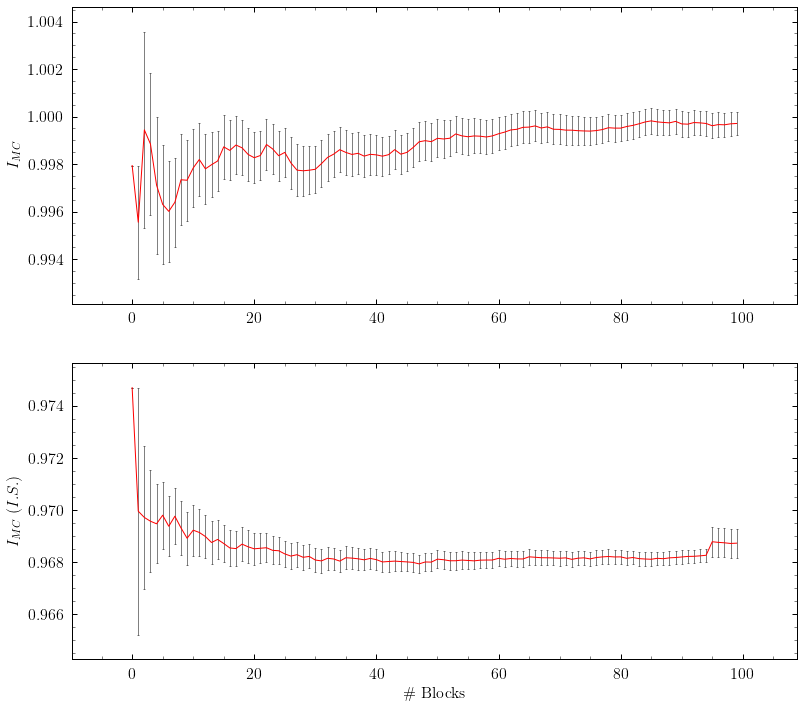

In [3]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(13,12))

# load MC integral results
df_mean = pd.read_csv("I1-blk.csv", header=None, names=["mean","mean_err"])
df_mean["mean"].plot.line(yerr=df_mean["mean_err"], color='r', ecolor='gray', capthick=0.5, ax=ax1)

# load MC integral results, important sampling
df_var = pd.read_csv("I2-blk.csv", header=None, names=["var","var_err"])
df_var["var"].plot.line(yerr=df_var["var_err"], color='r', ecolor='gray', capthick=0.5, ax=ax2)

ax1.set_ylabel("$I_{MC}$");

ax2.set_xlabel("\# Blocks");
ax2.set_ylabel("$I_{MC}\;(I.S.)$");

## Exercise 02.2